### Importing libraries

In [10]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn import metrics
import seaborn as sns; sns.set()

### importing Data

In [11]:
categories = ['rec.motorcycles', 'sci.electronics',
              'comp.graphics', 'sci.med']

# sklearn provides us with subset data for training and testing
train_data = fetch_20newsgroups(subset='train',
                                categories=categories, shuffle=True, random_state=42)

test_data = fetch_20newsgroups(subset='test',
                               categories=categories, shuffle=True, random_state=42)

### KNN Classifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
#pipelinnig the fuctions
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', knn)
])
pipeline.fit(train_data.data, train_data.target)
predicted = pipeline.predict(test_data.data)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       389
           1       0.84      0.92      0.88       398
           2       0.85      0.70      0.77       393
           3       0.87      0.83      0.85       396

    accuracy                           0.83      1576
   macro avg       0.83      0.83      0.82      1576
weighted avg       0.83      0.83      0.82      1576

0.8261421319796954


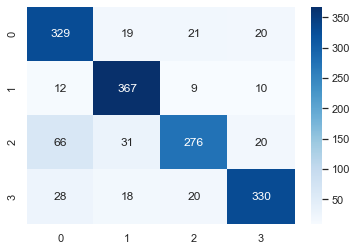

In [13]:
# accuray of the above
cm=metrics.confusion_matrix(test_data.target,predicted)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(test_data.target,predicted))
print(metrics.accuracy_score(test_data.target,predicted))

### MultiNomial Naive Bayes Classifier

In [14]:
mnb = MultinomialNB()
#pipelinnig the fuctions
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', mnb)
])
pipeline.fit(train_data.data, train_data.target)
predicted = pipeline.predict(test_data.data)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       389
           1       0.91      1.00      0.95       398
           2       0.91      0.86      0.88       393
           3       0.92      0.93      0.92       396

    accuracy                           0.91      1576
   macro avg       0.92      0.91      0.91      1576
weighted avg       0.92      0.91      0.91      1576

0.9149746192893401


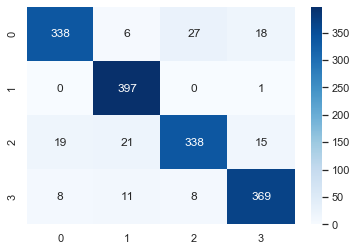

In [15]:
# accuracy of the above
cm=metrics.confusion_matrix(test_data.target,predicted)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(test_data.target,predicted))
print(metrics.accuracy_score(test_data.target,predicted))

### Gaussian Naive bayes Classifier

In [18]:
gnb = GaussianNB()

#countvectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.data)

#tfidf vectorizer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf=X_train_tfidf.todense() 

#fitting data into guassian NB classifier
gnb.fit(X_train_tfidf, train_data.target)

#transforming the test data
X_new_counts = count_vect.transform(test_data.data)

X_new_tfidf = tfidf_transformer.transform(X_new_counts)
X_new_tfidf=X_new_tfidf.todense() 

 # making prediction
predicted = gnb.predict(X_new_tfidf)


              precision    recall  f1-score   support

           0       0.78      0.77      0.77       389
           1       0.93      0.93      0.93       398
           2       0.81      0.73      0.77       393
           3       0.79      0.88      0.83       396

    accuracy                           0.83      1576
   macro avg       0.83      0.83      0.82      1576
weighted avg       0.83      0.83      0.83      1576

0.8261421319796954


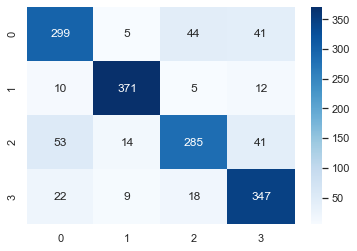

In [19]:
#accuracy of the above
cm=metrics.confusion_matrix(test_data.target,predicted)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(metrics.classification_report(test_data.target,predicted))
print(metrics.accuracy_score(test_data.target,predicted))

In [ ]:
# as we can see above the best result is given by Multinomial Naive bayes classifier